<a href="https://colab.research.google.com/github/Anilyadav94/Credit-Card-Fraud-Detection-using-CNN/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.0


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [67]:
data.shape

(263383, 31)

In [68]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263383 entries, 0 to 263382
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    263383 non-null  float64
 1   V1      263383 non-null  float64
 2   V2      263383 non-null  float64
 3   V3      263383 non-null  float64
 4   V4      263383 non-null  float64
 5   V5      263383 non-null  float64
 6   V6      263383 non-null  float64
 7   V7      263383 non-null  float64
 8   V8      263383 non-null  float64
 9   V9      263383 non-null  float64
 10  V10     263383 non-null  float64
 11  V11     263383 non-null  float64
 12  V12     263383 non-null  float64
 13  V13     263383 non-null  float64
 14  V14     263383 non-null  float64
 15  V15     263383 non-null  float64
 16  V16     263383 non-null  float64
 17  V17     263383 non-null  float64
 18  V18     263383 non-null  float64
 19  V19     263383 non-null  float64
 20  V20     263382 non-null  float64
 21  V21     26

In [70]:
data['Class'].value_counts()

0.00    262903
1.00       479
Name: Class, dtype: int64

In [71]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((262903, 31), (479, 31))

In [72]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(479, 31)

In [73]:
data = fraud.append(non_fraud, ignore_index=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.00,-2.31,1.95,-1.61,4.00,-0.52,-1.43,-2.54,1.39,-2.77,-2.77,3.20,-2.90,-0.60,-4.29,0.39,-1.14,-2.83,-0.02,0.42,0.13,0.52,-0.04,-0.47,0.32,0.04,0.18,0.26,-0.14,0.00,1.00
1,472.00,-3.04,-3.16,1.09,2.29,1.36,-1.06,0.33,-0.07,-0.27,-0.84,-0.41,-0.50,0.68,-1.69,2.00,0.67,0.60,1.73,0.28,2.10,0.66,0.44,1.38,-0.29,0.28,-0.15,-0.25,0.04,529.00,1.00
2,4462.00,-2.30,1.76,-0.36,2.33,-0.82,-0.08,0.56,-0.40,-0.24,-1.53,2.03,-6.56,0.02,-1.47,-0.70,-2.28,-4.78,-2.62,-1.33,-0.43,-0.29,-0.93,0.17,-0.09,-0.16,-0.54,0.04,-0.15,239.93,1.00
3,6986.00,-4.40,1.36,-2.59,2.68,-1.13,-1.71,-3.50,-0.25,-0.25,-4.80,4.90,-10.91,0.18,-6.77,-0.01,-7.36,-12.60,-5.13,0.31,-0.17,0.57,0.18,-0.44,-0.05,0.25,-0.66,-0.83,0.85,59.00,1.00
4,7519.00,1.23,3.02,-4.30,4.73,3.62,-1.36,1.71,-0.50,-1.28,-2.45,2.10,-4.61,1.46,-6.08,-0.34,2.58,6.74,3.04,-2.72,0.01,-0.38,-0.70,-0.66,-1.63,1.49,0.57,-0.01,0.15,1.00,1.00


In [74]:
data['Class'].value_counts()

0.00    479
1.00    479
Name: Class, dtype: int64

In [75]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [77]:
X_train.shape, X_test.shape

((766, 30), (192, 30))

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.shape

(766, 30)

In [79]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((766, 30, 1), (192, 30, 1))

In [80]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [82]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 17ms/step - loss: 0.8587 - accuracy: 0.6090 - val_loss: 0.6001 - val_accuracy: 0.8594
Epoch 2/20
24/24 [==============================] - 0s 10ms/step - loss: 0.4771 - accuracy: 0.8349 - val_loss: 0.5615 - val_accuracy: 0.8750
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 0.4548 - accuracy: 0.8215 - val_loss: 0.5257 - val_accuracy: 0.9010
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 0.3929 - accuracy: 0.8631 - val_loss: 0.4983 - val_accuracy: 0.9062
Epoch 5/20
24/24 [==============================] - 0s 10ms/step - loss: 0.3183 - accuracy: 0.8914 - val_loss: 0.4667 - val_accuracy: 0.9167
Epoch 6/20
24/24 [==============================] - 0s 10ms/step - loss: 0.2924 - accuracy: 0.9003 - val_loss: 0.4343 - val_accuracy: 0.9219
Epoch 7/20
24/24 [==============================] - 0s 10ms/step - loss: 0.3274 - accuracy: 0.8634 - val_loss: 0.3956 - val_accuracy: 0.9115
Epoch 8/20
24/2

In [84]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

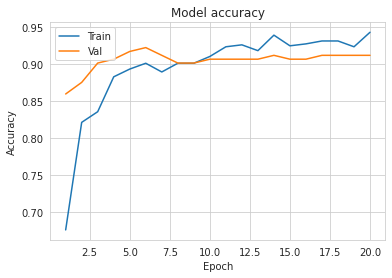

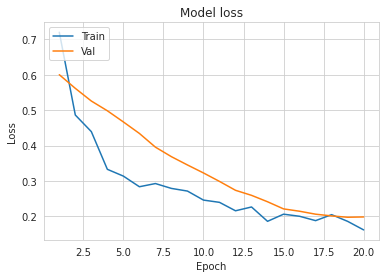

In [85]:
plot_learningCurve(history, epochs)

In [86]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 14ms/step - loss: 0.9686 - accuracy: 0.5706 - val_loss: 0.6438 - val_accuracy: 0.7135
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 0.7545 - accuracy: 0.6891 - val_loss: 0.6255 - val_accuracy: 0.7969
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.7012 - accuracy: 0.7150 - val_loss: 0.6007 - val_accuracy: 0.8333
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.7126 - val_loss: 0.5743 - val_accuracy: 0.8385
Epoch 5/50
24/24 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.7630 - val_loss: 0.5467 - val_accuracy: 0.8333
Epoch 6/50
24/24 [==============================] - 0s 6ms/step - loss: 0.5134 - accuracy: 0.7848 - val_loss: 0.5185 - val_accuracy: 0.8438
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 0.3948 - accuracy: 0.8228 - val_loss: 0.4887 - val_accuracy: 0.8542
Epoch 8/50
24/24 [=

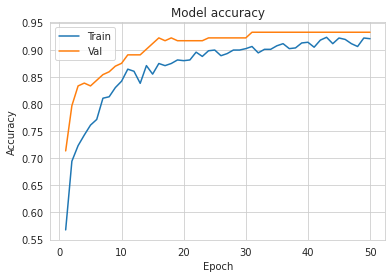

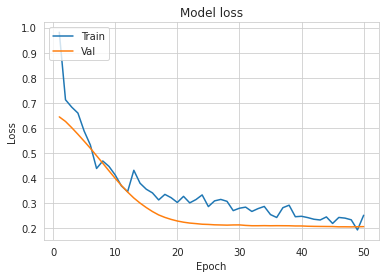

In [87]:
plot_learningCurve(history, epochs)